In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from strategy import *

%matplotlib inline

bt version :  (0, 2, 10)


In [2]:
# 투자자산
tickers = ['TQQQ','TMF']
safe_ticker = ['BIL']

In [3]:
data = yf.download(tickers+safe_ticker, end='2022-12-10')['Adj Close']
data = data[tickers+safe_ticker]
for c in data.columns:
    print(c, data[c].first_valid_index())
assets = data.dropna().copy()
    
start_day = assets.index.min() + pd.DateOffset(months=12)
print('asset \n', assets)
print('start day : ', start_day)

[*********************100%***********************]  3 of 3 completed
TQQQ 2010-02-11 00:00:00
TMF 2009-04-16 00:00:00
BIL 2007-05-30 00:00:00
asset 
                  TQQQ        TMF        BIL
Date                                       
2010-02-11   0.431471   6.695424  86.559998
2010-02-12   0.433238   6.771190  86.559998
2010-02-16   0.450019   6.831801  86.559998
2010-02-17   0.457656   6.613165  86.503380
2010-02-18   0.466332   6.500602  86.541138
...               ...        ...        ...
2022-12-05  22.230000   9.230000  91.449997
2022-12-06  20.820000   9.590000  91.480003
2022-12-07  20.570000  10.230000  91.480003
2022-12-08  21.299999  10.160000  91.540001
2022-12-09  20.889999   9.380000  91.529999

[3231 rows x 3 columns]
start day :  2011-02-11 00:00:00


In [4]:
# 절대모멘텀 백테스트
def AbsoluteMomentum_BT(assets, rank, months, start_day, run_on_end_of_period=False, lag=1, name='Absolute Momentum'):
    s = bt.Strategy(name, [bt.algos.RunAfterDate(start_day),
                           bt.algos.RunMonthly(run_on_first_date=False, run_on_end_of_period=run_on_end_of_period, run_on_last_date=False),
                           #bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}'),
                           #bt.algos.PrintDate(),
                           SelectAbsoluteMomentum(rank=rank, lookback=pd.DateOffset(months=months), lag=pd.DateOffset(days=lag)),
                           bt.algos.WeighEqually(),
                           #bt.algos.PrintTempData(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, assets, initial_capital=10000.0)

In [5]:
# 절대모멘텀 상위 1종목 (1~12개월 비교)
absolutemomentum = {}
for i in range(0, 12):   
    absolutemomentum[i] = AbsoluteMomentum_BT(assets[tickers[0]].to_frame(), 1, i+1, start_day, False, 1, name='{}({})'.format(tickers[0],str(i+1)))
    
am_report = bt.run(*absolutemomentum.values())

Stat                 TQQQ(1)     TQQQ(2)     TQQQ(3)     TQQQ(4)     TQQQ(5)     TQQQ(6)     TQQQ(7)     TQQQ(8)     TQQQ(9)     TQQQ(10)    TQQQ(11)    TQQQ(12)
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11
End                  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         231.85%     146.17%     245.06%     953.03%     1119.48%    890.60%     908.34%     610.22%     656.00%     747.99%     333.39%     545.02%
Daily Sharpe         0.46

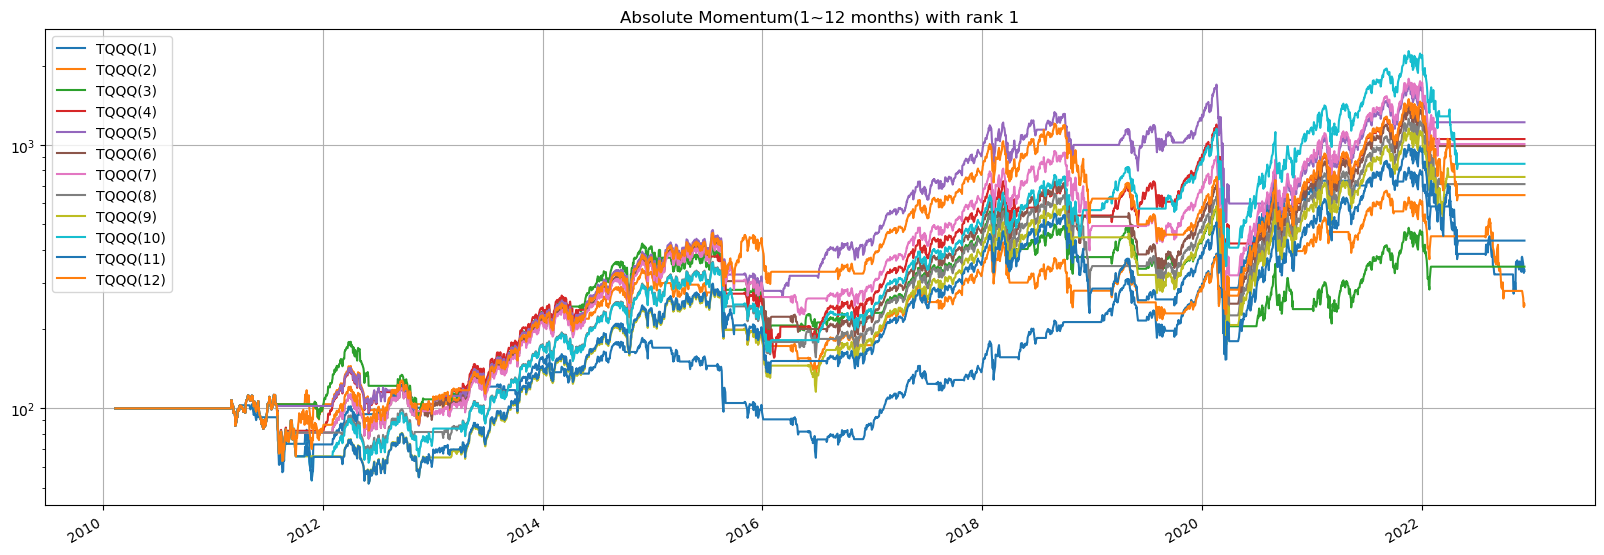

In [6]:
am_report.plot(figsize=(20,7), grid=True, logy=True, title='Absolute Momentum(1~12 months) with rank 1')
am_report.set_date_range(start=start_day)
am_report.display()

In [7]:
# 절대모멘텀 상위 1종목 (1~12개월 비교)
absolutemomentum = {}
for i in range(0, 12):   
    absolutemomentum[i] = AbsoluteMomentum_BT(assets[tickers], 1, i+1, start_day, False, 1, name='AM({})'.format(str(i+1)))
    
am1_report = bt.run(*absolutemomentum.values())

Stat                 AM(1)       AM(2)       AM(3)       AM(4)       AM(5)       AM(6)       AM(7)       AM(8)       AM(9)       AM(10)      AM(11)      AM(12)
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11
End                  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         627.54%     259.21%     962.55%     1159.77%    827.13%     267.40%     153.38%     138.91%     549.06%     318.85%     193.58%     118.88%
Daily Sharpe         0.57  

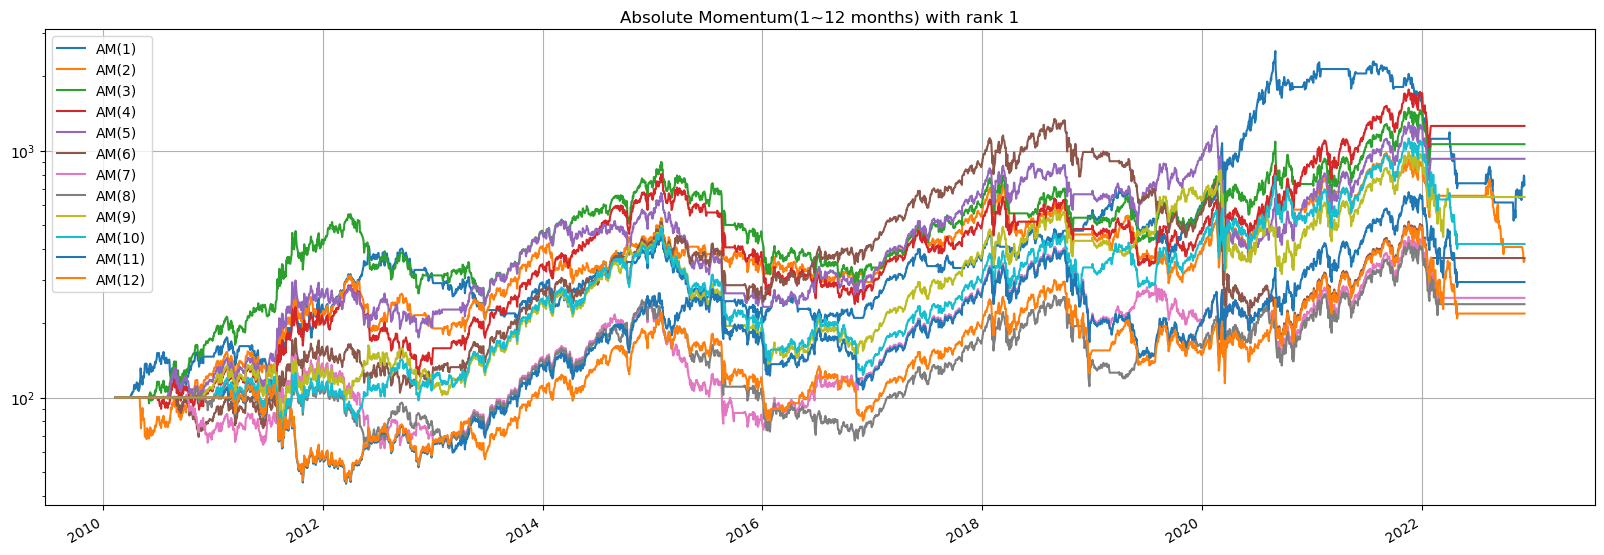

In [10]:
am1_report.plot(figsize=(20,7), grid=True, logy=True, title='Absolute Momentum(1~12 months) with rank 1')
am1_report.set_date_range(start=start_day)
am1_report.display()
#am1_report.prices[start_day:].calc_stats().display()


In [11]:
am1_report.get_transactions('AM(4)')

price  quantity
Date       Security                     
2010-07-01 TMF        9.975432    1002.0
2010-11-01 TMF        9.349350   -1002.0
           TQQQ       0.680430   13774.0
2011-06-01 TMF        9.039929    1310.0
           TQQQ       0.860137  -13774.0
...                        ...       ...
2020-03-02 TMF       35.736794    1311.0
           TQQQ      21.877501   -2141.0
2020-07-01 TMF       38.564053   -1311.0
           TQQQ      25.285000    1999.0
2022-02-01 TQQQ      63.009998   -1999.0

[66 rows x 2 columns]

In [12]:
# 절대모멘텀 상위 2종목 (1~12개월 비교)
absolutemomentum = {}
for i in range(0, 12):   
    absolutemomentum[i] = AbsoluteMomentum_BT(assets[tickers], 2, i+1, start_day, False, 1, name='AM({})'.format(str(i+1)))
    
am2_report = bt.run(*absolutemomentum.values())

Stat                 AM(1)       AM(2)       AM(3)       AM(4)       AM(5)       AM(6)       AM(7)       AM(8)       AM(9)       AM(10)      AM(11)      AM(12)
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11  2010-02-11
End                  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         279.80%     284.75%     693.93%     1223.32%    1257.74%    1967.67%    1536.06%    1421.97%    878.18%     1345.21%    380.14%     339.44%
Daily Sharpe         0.46  

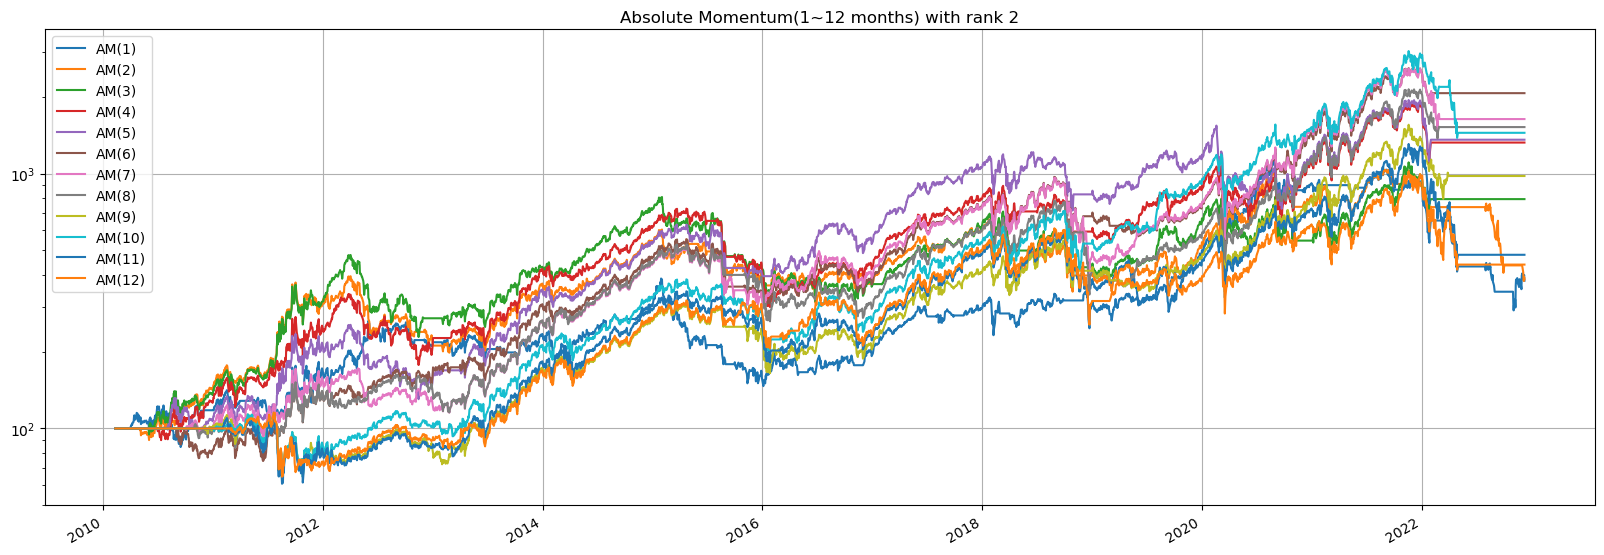

In [14]:
am2_report.plot(figsize=(20,7), grid=True, logy=True, title='Absolute Momentum(1~12 months) with rank 2')
am2_report.set_date_range(start=start_day)
am2_report.display()
#am1_report.prices[start_day:].calc_stats().display()